# Part B: Algorithmic Stock Data Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Possible-Trends-and-Correlations-Between-Various-Attributes" data-toc-modified-id="Possible-Trends-and-Correlations-Between-Various-Attributes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Possible Trends and Correlations Between Various Attributes</a></span></li></ul></li><li><span><a href="#Measuring-Market-Impact-of-Algorithmic-Trading" data-toc-modified-id="Measuring-Market-Impact-of-Algorithmic-Trading-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Measuring Market Impact of Algorithmic Trading</a></span><ul class="toc-item"><li><span><a href="#Impact-on-Spread" data-toc-modified-id="Impact-on-Spread-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Impact on Spread</a></span></li><li><span><a href="#Impact-on-Participation_Rate" data-toc-modified-id="Impact-on-Participation_Rate-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Impact on Participation_Rate</a></span></li></ul></li><li><span><a href="#Choice-of-Metric" data-toc-modified-id="Choice-of-Metric-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Choice of Metric</a></span></li><li><span><a href="#Measuring-&amp;-Analyzing-Impact-of-Possible-Variables-on-Metric-(Shortfalls)" data-toc-modified-id="Measuring-&amp;-Analyzing-Impact-of-Possible-Variables-on-Metric-(Shortfalls)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Measuring &amp; Analyzing Impact of Possible Variables on Metric (Shortfalls)</a></span><ul class="toc-item"><li><span><a href="#Effect-of-Various-Algorithms-on-VWAP-Shortfall" data-toc-modified-id="Effect-of-Various-Algorithms-on-VWAP-Shortfall-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Effect of Various Algorithms on VWAP Shortfall</a></span></li><li><span><a href="#Effect-of-Various-Algorithm-Classes-on-VWAP-Shortfall" data-toc-modified-id="Effect-of-Various-Algorithm-Classes-on-VWAP-Shortfall-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Effect of Various Algorithm Classes on VWAP Shortfall</a></span></li><li><span><a href="#T-test-For-Comparing-Broker's-Performance" data-toc-modified-id="T-test-For-Comparing-Broker's-Performance-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>T-test For Comparing Broker's Performance</a></span></li></ul></li><li><span><a href="#Predicting-Arrival-Shortfall" data-toc-modified-id="Predicting-Arrival-Shortfall-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predicting Arrival Shortfall</a></span><ul class="toc-item"><li><span><a href="#Classification-Based-Confusion-Matrix" data-toc-modified-id="Classification-Based-Confusion-Matrix-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Classification-Based Confusion Matrix</a></span></li><li><span><a href="#Principal-Component-Analysis-For-Visualization" data-toc-modified-id="Principal-Component-Analysis-For-Visualization-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Principal Component Analysis For Visualization</a></span></li></ul></li><li><span><a href="#Important-Predictors-of-Arrival-Shortfall" data-toc-modified-id="Important-Predictors-of-Arrival-Shortfall-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Important Predictors of Arrival Shortfall</a></span></li><li><span><a href="#Measuring-Impact-of-Features-on-Side" data-toc-modified-id="Measuring-Impact-of-Features-on-Side-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Measuring Impact of Features on Side</a></span></li></ul></div>

## Importing Libraries

In [150]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
import math
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats 
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, 
                             precision_recall_curve, f1_score, fbeta_score, roc_auc_score, roc_curve, classification_report)

from xgboost import XGBClassifier
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv('/Users/chaudhary/Downloads/data2.csv')
df.head()

,TradeDay,ADV_Percent,Algo,Arrival_Price,Arrival_Shortfall,Broker,Close_Price,Close_Shortfall,Exec_Qty,ExecPrice,...,Dow_Arrival,Nasdaq_Arrival,SP_Open,Russell_Open,Nasdaq_Open,Dow_Open,SP_CashClose,Russell_CashClose,Dow_CashClose,Nasdaq_CashClose
0,20170103,0.005144,Algo_D,115.395000,-3.750202,Broker_A,116.150000,-68.727938,1449.0,115.351725,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
1,20170103,0.010008,Algo_D,62.295000,3.321282,Broker_A,62.410000,-15.111336,928.0,62.315690,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
2,20170103,0.009576,Algo_D,81.924999,-20.675037,Broker_A,82.610001,-103.423508,388.0,81.755619,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
3,20170103,0.314960,Algo_D,141.349998,-7.905092,Broker_A,143.240005,-139.747656,4777.0,141.238260,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
4,20170103,0.638424,Algo_D,32.184999,4.949987,Broker_A,32.290000,-27.584082,11495.0,32.200931,...,19722,4887.75,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5


__Converting 'ReportDate' Column to appropriate date format:__

In [3]:
df['TradeDay'] = pd.to_datetime(df['TradeDay'], format = "%Y%m%d").dt.strftime('%Y-%m-%d') 

In [4]:
# Convert 'Date' column values to datetime data type
df.TradeDay = pd.to_datetime(df.TradeDay)

In [5]:
df.head()

,TradeDay,ADV_Percent,Algo,Arrival_Price,Arrival_Shortfall,Broker,Close_Price,Close_Shortfall,Exec_Qty,ExecPrice,...,Dow_Arrival,Nasdaq_Arrival,SP_Open,Russell_Open,Nasdaq_Open,Dow_Open,SP_CashClose,Russell_CashClose,Dow_CashClose,Nasdaq_CashClose
0,2017-01-03,0.005144,Algo_D,115.395000,-3.750202,Broker_A,116.150000,-68.727938,1449.0,115.351725,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
1,2017-01-03,0.010008,Algo_D,62.295000,3.321282,Broker_A,62.410000,-15.111336,928.0,62.315690,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
2,2017-01-03,0.009576,Algo_D,81.924999,-20.675037,Broker_A,82.610001,-103.423508,388.0,81.755619,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
3,2017-01-03,0.314960,Algo_D,141.349998,-7.905092,Broker_A,143.240005,-139.747656,4777.0,141.238260,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
4,2017-01-03,0.638424,Algo_D,32.184999,4.949987,Broker_A,32.290000,-27.584082,11495.0,32.200931,...,19722,4887.75,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5


In [7]:
# Checking for any null values

df.isnull().sum()

TradeDay                 0
ADV_Percent              0
Algo                     0
Arrival_Price            0
Arrival_Shortfall        0
Broker                   0
Close_Price              0
Close_Shortfall          0
Exec_Qty                 0
ExecPrice                0
Order_Qty                0
Participation_Rate       0
Side                     0
Spread                   0
StrikeTime               0
Symbol                   0
VWAP_Shortfall           0
Ver1.2                   0
ArrivalToCloseReturn     0
DirectionToClose         0
Notional                 0
DayOfWeek                0
Tic                      0
Name                     0
MarketCap                0
DailyVolume              0
Open                     0
High                     0
Low                      0
Close                    0
ADV_20d                  0
FORT_ADV_Pct             0
Vol_Over_ADV             0
MktCapClass              0
AlgoClass                0
OpenToArrivalReturn      0
ArrivalDirection         0
M

There are 4 columns with some null values. At this point, we will leave it as it is since we are not going to use those columns for our analaysis.

__Grouping Dataframe Based on "Side"__

In [8]:
# Storing dataframes as dictionary. This allows to access dataframes based on group keys.

d = dict(tuple(df.groupby("Side"))) 

In [9]:
df_buy = d['Buy']
df_sell = d['Sell']

In [10]:
df_buy.head()

,TradeDay,ADV_Percent,Algo,Arrival_Price,Arrival_Shortfall,Broker,Close_Price,Close_Shortfall,Exec_Qty,ExecPrice,...,Dow_Arrival,Nasdaq_Arrival,SP_Open,Russell_Open,Nasdaq_Open,Dow_Open,SP_CashClose,Russell_CashClose,Dow_CashClose,Nasdaq_CashClose
0,2017-01-03,0.005144,Algo_D,115.395000,-3.750202,Broker_A,116.150000,-68.727938,1449.0,115.351725,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
1,2017-01-03,0.010008,Algo_D,62.295000,3.321282,Broker_A,62.410000,-15.111336,928.0,62.315690,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
2,2017-01-03,0.009576,Algo_D,81.924999,-20.675037,Broker_A,82.610001,-103.423508,388.0,81.755619,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
3,2017-01-03,0.314960,Algo_D,141.349998,-7.905092,Broker_A,143.240005,-139.747656,4777.0,141.238260,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
4,2017-01-03,0.638424,Algo_D,32.184999,4.949987,Broker_A,32.290000,-27.584082,11495.0,32.200931,...,19722,4887.75,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5


In [11]:
df_sell.head()

,TradeDay,ADV_Percent,Algo,Arrival_Price,Arrival_Shortfall,Broker,Close_Price,Close_Shortfall,Exec_Qty,ExecPrice,...,Dow_Arrival,Nasdaq_Arrival,SP_Open,Russell_Open,Nasdaq_Open,Dow_Open,SP_CashClose,Russell_CashClose,Dow_CashClose,Nasdaq_CashClose
5,2017-01-03,0.078255,Algo_D,32.184999,-8.083124,Broker_A,32.290000,24.461133,1409.0,32.211015,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
20,2017-01-03,2.167253,Algo_D,21.775000,32.450801,Broker_A,21.850000,66.664704,9797.0,21.704338,...,19720,4886.25,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
27,2017-01-03,0.168912,Algo_D,78.375000,26.179806,Broker_A,78.879997,90.033152,2066.0,78.169816,...,19728,4889.50,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
34,2017-01-03,0.371260,Algo_W,48.680000,10.774097,Broker_A,48.700001,14.876542,1009.0,48.627552,...,19724,4888.00,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5
36,2017-01-03,0.327271,Algo_W,91.049999,43.543354,Broker_A,90.650000,-0.390182,1131.0,90.653537,...,19724,4888.00,2251.25,1375.6,4902.25,19853,2252.5,1364.2,19803.0,4907.5


We will first create a new dataframe (with relevant columns) for Buy side and check for possible correlations using pairplot method in Seaborn.

In [12]:
df_buy_selected = df_buy[['Arrival_Price','Arrival_Shortfall','Close_Price','Close_Shortfall','Exec_Qty','ExecPrice','Participation_Rate','Spread','VWAP_Shortfall','ArrivalToCloseReturn','Notional','ADV_20d','FORT_ADV_Pct','Vol_Over_ADV','OpenToArrivalReturn','OpenToCloseReturn']]

In [13]:
df_buy_selected.head()

,Arrival_Price,Arrival_Shortfall,Close_Price,Close_Shortfall,Exec_Qty,ExecPrice,Participation_Rate,Spread,VWAP_Shortfall,ArrivalToCloseReturn,Notional,ADV_20d,FORT_ADV_Pct,Vol_Over_ADV,OpenToArrivalReturn,OpenToCloseReturn
0,115.395000,-3.750202,116.150000,-68.727938,1449.0,115.351725,3.609596,0.866774,-1.590897,65.427401,168301.35000,28592876.00,0.005068,1.006167,-34.974050,30.224525
1,62.295000,3.321282,62.410000,-15.111336,928.0,62.315690,0.655645,1.604996,3.308323,18.460514,57916.47986,7102380.35,0.013066,1.312300,-99.332473,-81.055308
2,81.924999,-20.675037,82.610001,-103.423508,388.0,81.755619,0.265841,6.102584,-14.361085,83.613229,32052.68024,2079935.45,0.018654,1.987287,434.976339,522.226468
3,141.349998,-7.905092,143.240005,-139.747656,4777.0,141.238260,41.676845,7.073990,0.297330,133.711144,684257.50630,1123868.40,0.425050,1.357769,-220.700256,-89.940501
4,32.184999,4.949987,32.290000,-27.584082,11495.0,32.200931,26.079953,3.106516,0.227718,32.624058,371173.55000,2323461.90,0.494736,0.824771,38.989230,71.740487


## Exploratory Data Analysis

### Possible Trends and Correlations Between Various Attributes

__Pair plot showing relations between different variables__

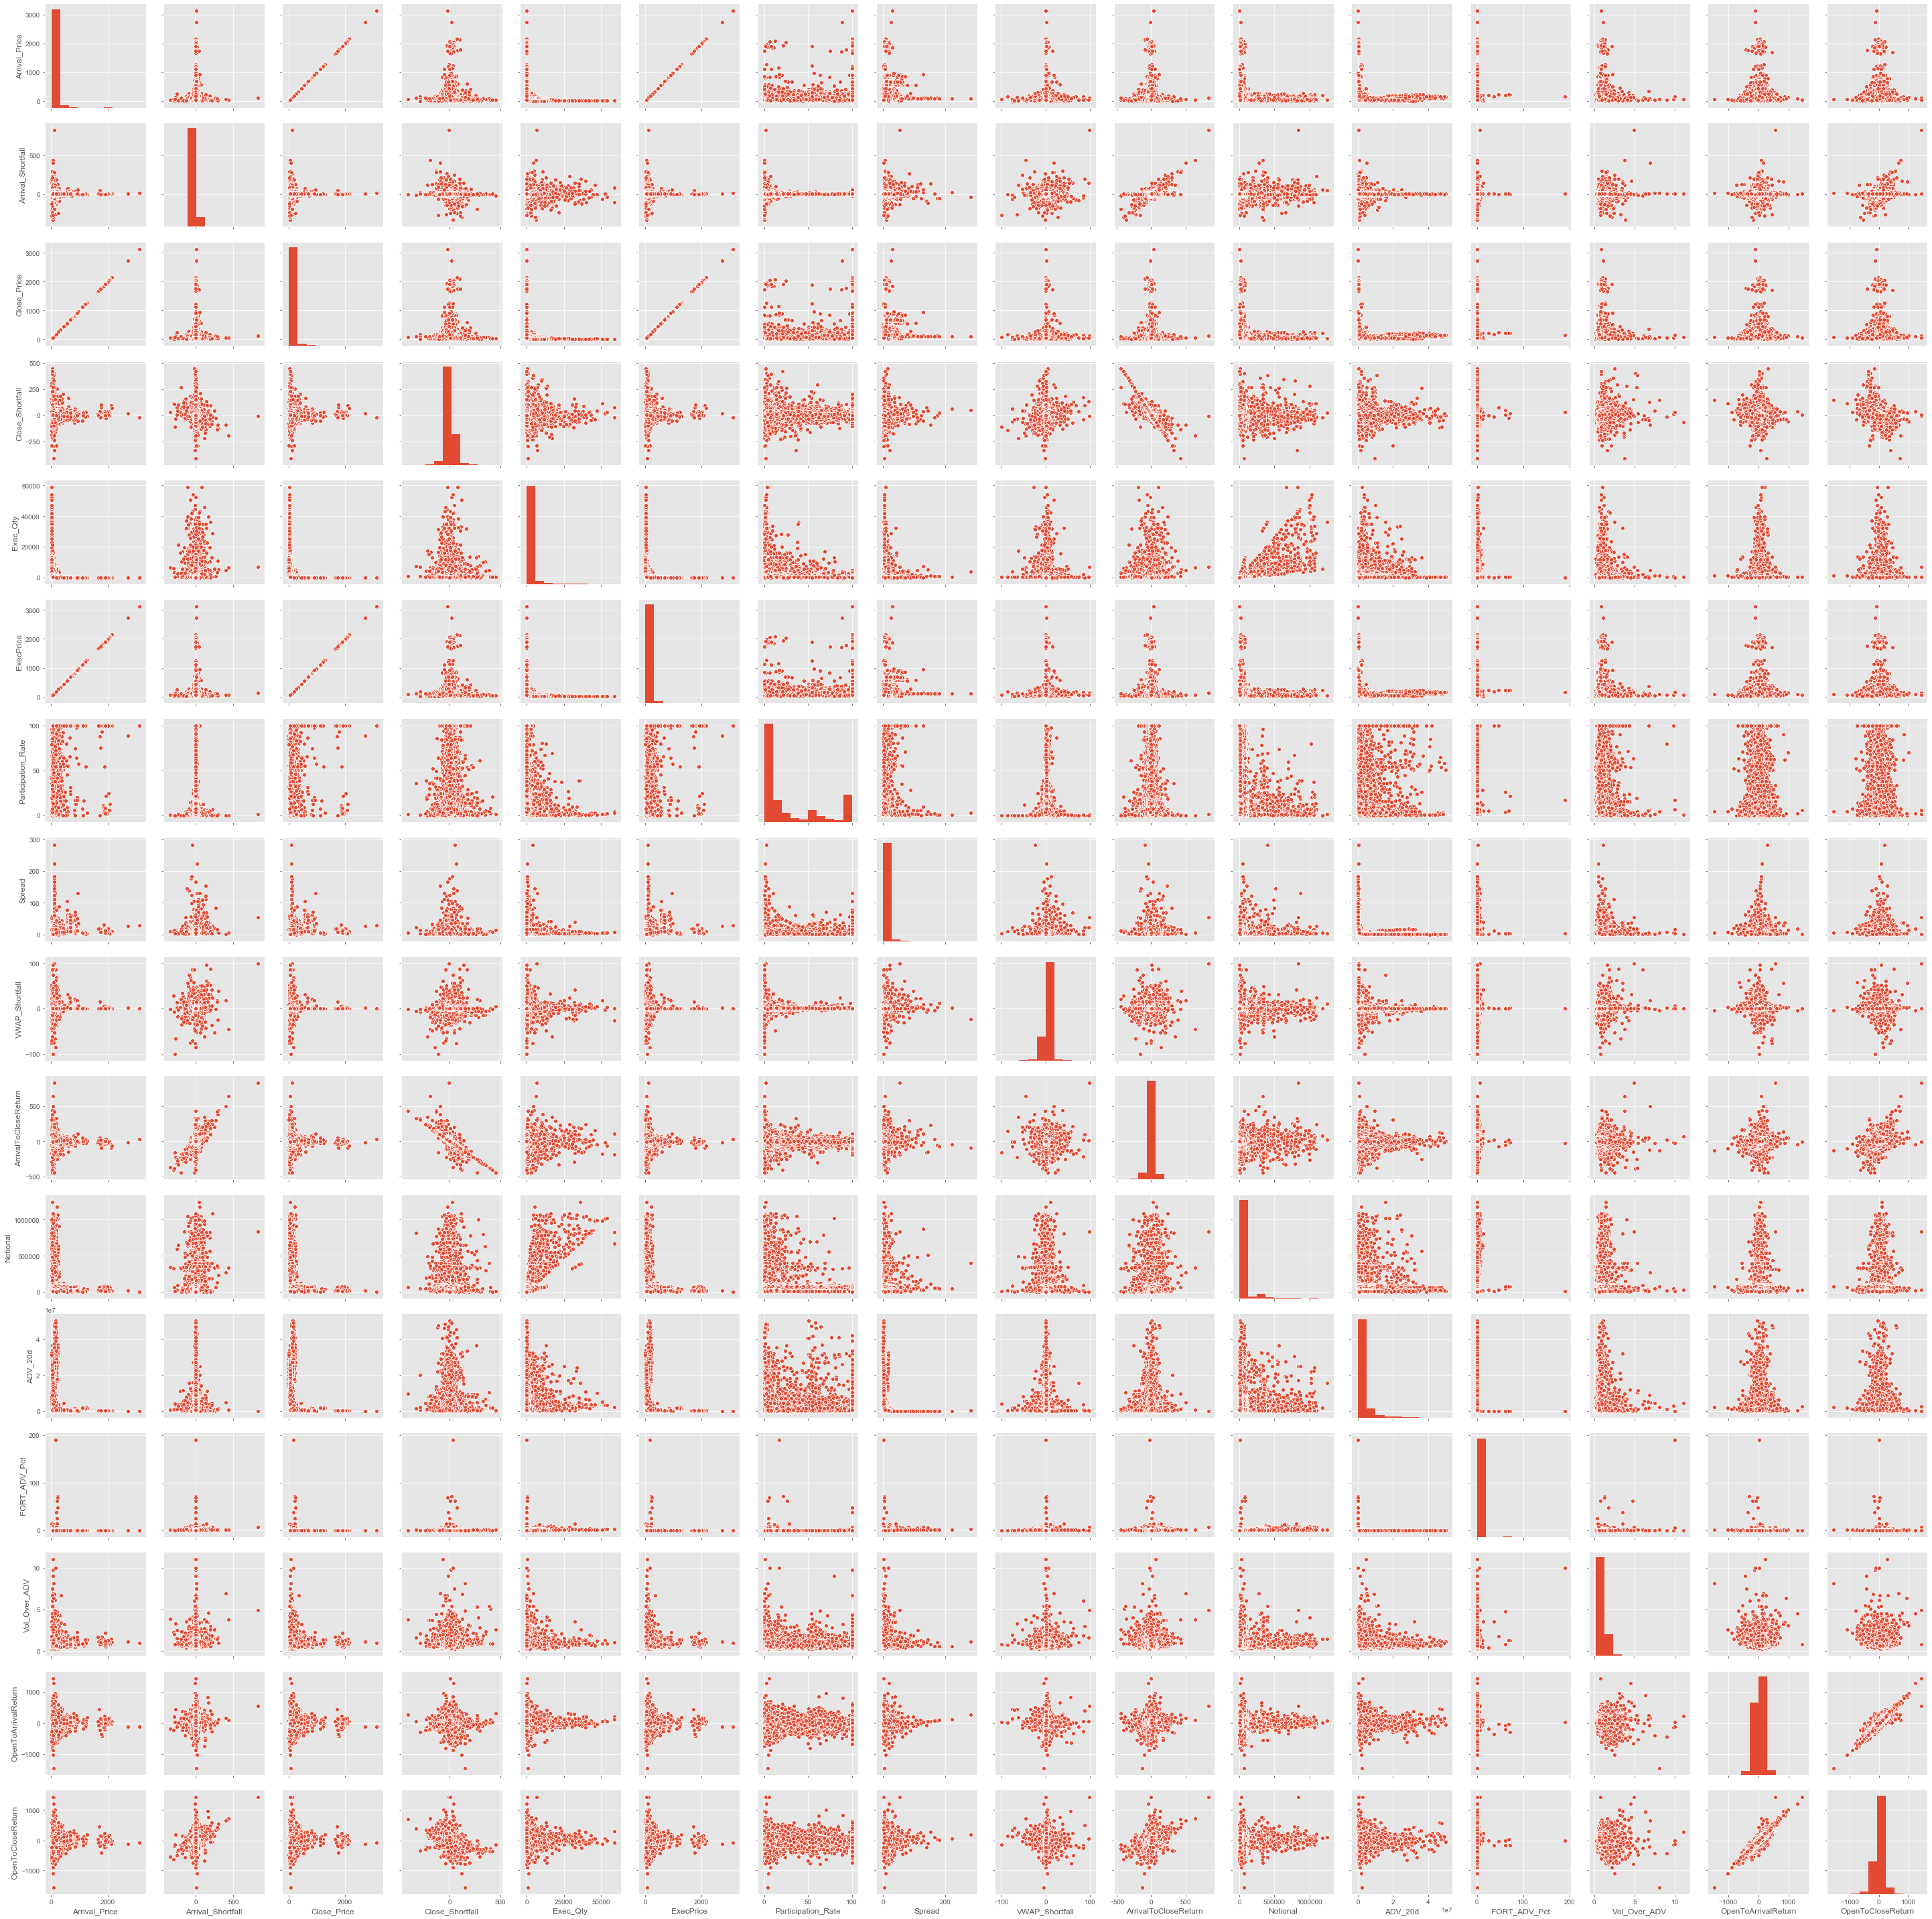

In [16]:
"""
Pairplot to show the correlation between different features in the dataset 
and the target variable, "Arrival_Shortfall". This is important step in finding out possible candidates for feature engineering.
"""

sns.pairplot(df_buy_selected)
sns.set(font_scale=1.5)

__Correlation heatmap showing correlation between various variables__

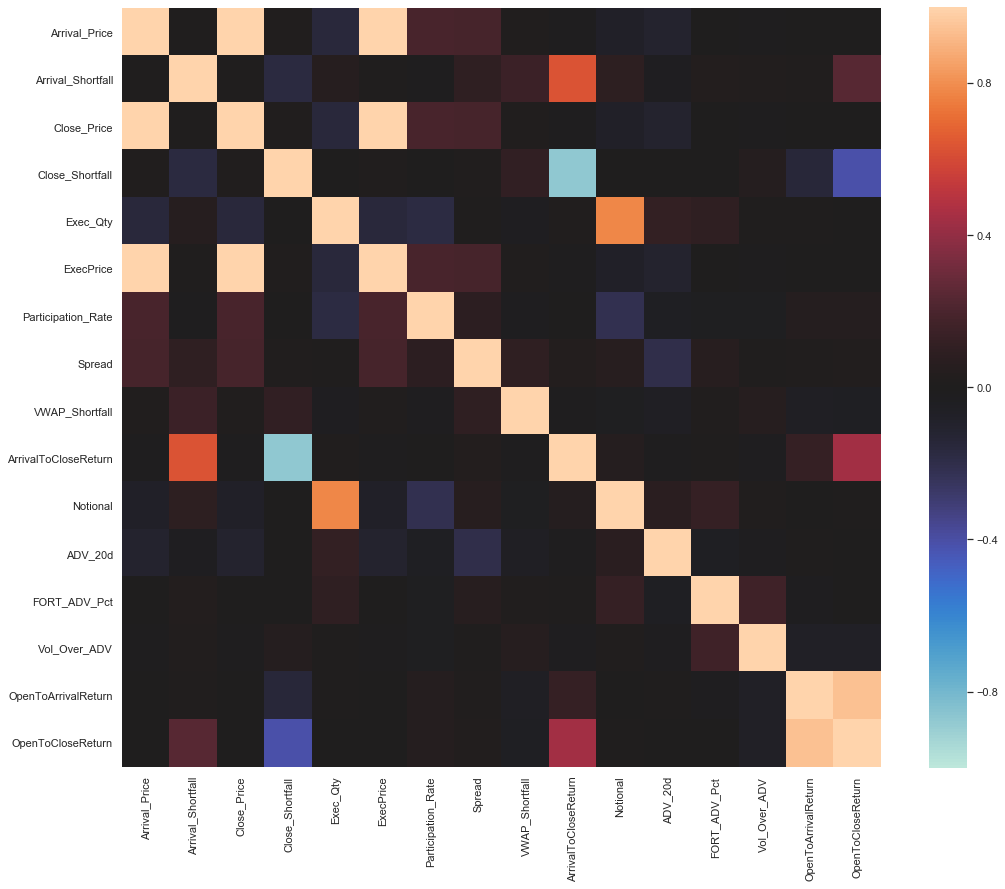

In [18]:
fig, ax = plt.subplots(figsize=(17,14))
sns.heatmap(df_buy_selected.corr(), square=True,vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.set(font_scale=1)
plt.savefig('PB_1.jpg',dpi=200)

## Measuring Market Impact of Algorithmic Trading

### Impact on Spread

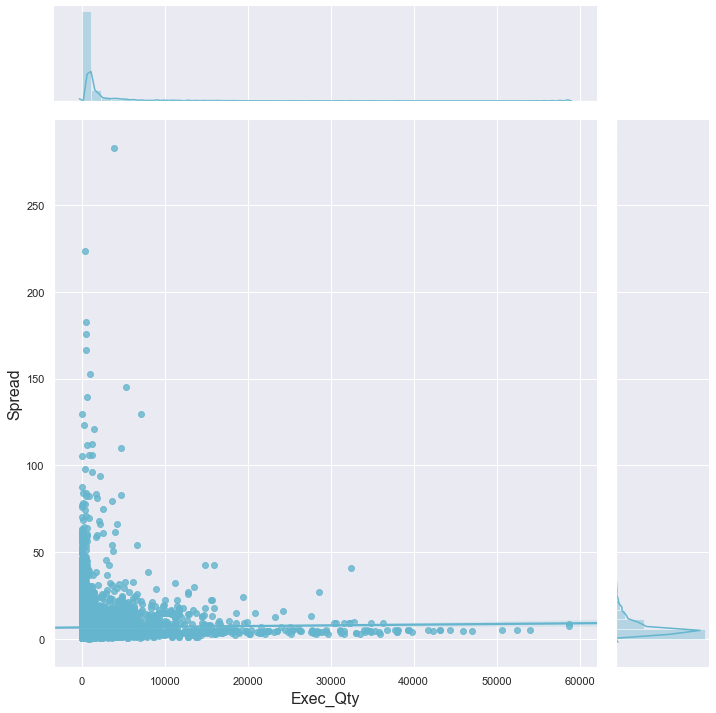

In [19]:
(sns.jointplot(x=df_buy_selected['Exec_Qty'], y=df_buy_selected['Spread'],kind="reg", 
               truncate=False,color="c", height=10)).set_axis_labels('Exec_Qty', 'Spread', fontsize=16)
plt.savefig('PB_2.jpg',dpi=200)

### Impact on Participation_Rate

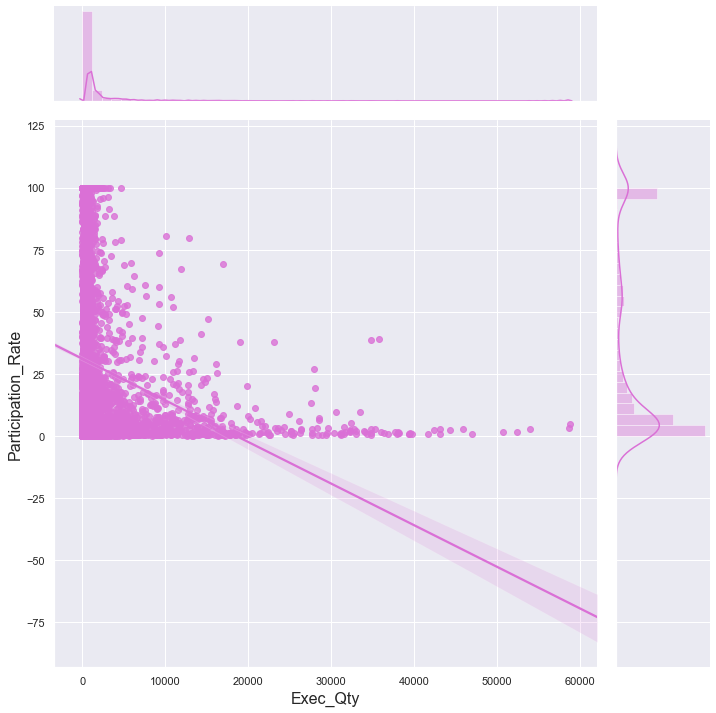

In [20]:
sns.jointplot(x=df_buy_selected['Exec_Qty'], y=df_buy_selected['Participation_Rate'],kind="reg", truncate=False,color="orchid", height=10).set_axis_labels('Exec_Qty', 'Participation_Rate', fontsize=16)
plt.savefig('PB_3.jpg',dpi=200)

## Choice of Metric

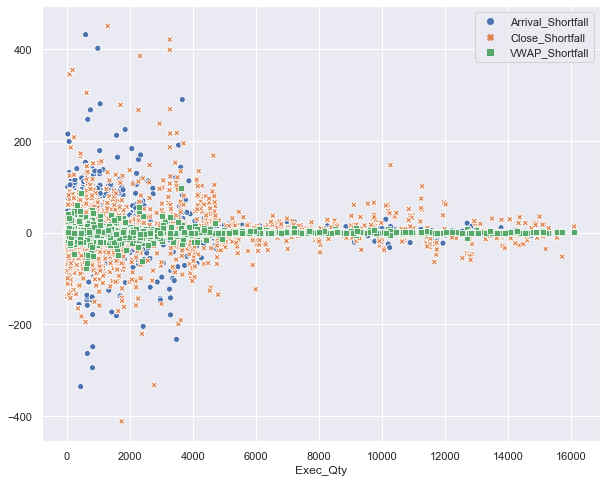

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

selected_df = pd.DataFrame(df_buy_selected, df_buy_selected['Exec_Qty'], ["Arrival_Shortfall", "Close_Shortfall", "VWAP_Shortfall"])
sns.scatterplot(data=selected_df)
plt.savefig('PB_4.jpg',dpi=200)

It is difficult to define a standard metric to measure a trader’s performance. Arrival shortfall is established before the trading process, whereas VWAP (volume weighted average price) is established during the trading process. In this project, since VWAP captures the trading process and the distribution of VWAP shortfall with executed quantity is narrow (close to zero), VWAP shortfall is the choice of metric for measuring the trading performance

## Measuring & Analyzing Impact of Possible Variables on Metric (Shortfalls)

### Effect of Various Algorithms on VWAP Shortfall

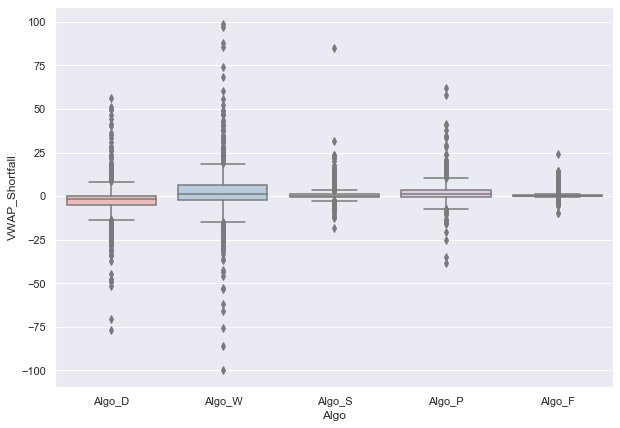

In [22]:
# Grouped boxplot
fig, ax = plt.subplots(figsize=(10,7))

sns.boxplot(x=df_buy["Algo"], y=df_buy["VWAP_Shortfall"], data=df_buy, palette="Pastel1")
plt.savefig('PB_5.jpg',dpi=200)
plt.show()

In [24]:
algo_d = df_buy[df_buy['Algo'] == 'Algo_D']['VWAP_Shortfall']
algo_w = df_buy[df_buy['Algo'] == 'Algo_W']['VWAP_Shortfall']
algo_s = df_buy[df_buy['Algo'] == 'Algo_S']['VWAP_Shortfall']
algo_p = df_buy[df_buy['Algo'] == 'Algo_P']['VWAP_Shortfall']
algo_f = df_buy[df_buy['Algo'] == 'Algo_F']['VWAP_Shortfall']

In [25]:
# T-test

stats.ttest_ind(algo_d,algo_w)

Ttest_indResult(statistic=-10.274281734894535, pvalue=3.124870422031205e-24)

__Since the p-value < 0.05, we reject the null hypothesis of equal averages, and conclude that the mean VWAP_Shortfall value across Algo_D and Algo_W are significantly different.__

In [26]:
# F-test

In [27]:
stats.f_oneway(algo_d,algo_w,algo_s,algo_p,algo_f)

F_onewayResult(statistic=142.7736262780084, pvalue=2.90559719780924e-119)

__Similarly, our F-statistic of 142.77 suggests the between-groups variance is 143x the within-group variance. Now we know the ratio of our variances doesn’t equal one, and the null hypothesis of equal mean values is rejected due to the p-value being < 0.05.__

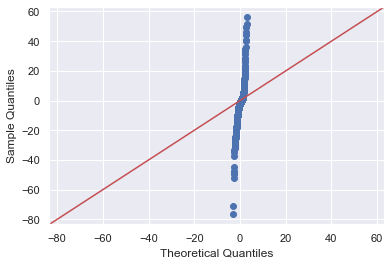

In [30]:
sm.qqplot(algo_d, line ='45') 
plt.savefig('PB_6.jpg',dpi=200)
plt.show()

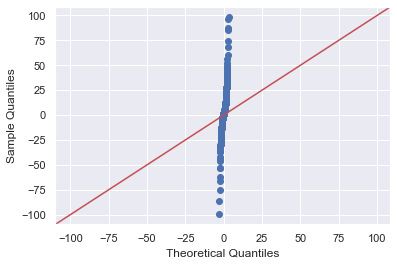

In [29]:
sm.qqplot(algo_w, line ='45') 
plt.show()

### Effect of Various Algorithm Classes on VWAP Shortfall

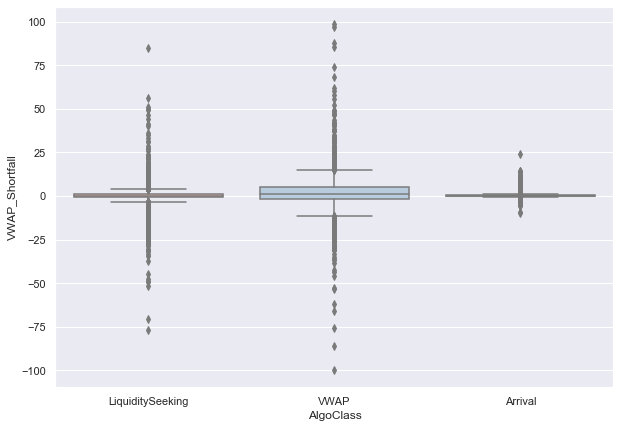

In [31]:
# Grouped boxplot
fig, ax = plt.subplots(figsize=(10,7))

sns.boxplot(x=df_buy["AlgoClass"], y=df_buy["VWAP_Shortfall"], data=df_buy, palette="Pastel1")
plt.savefig('PB_7.jpg',dpi=200)

plt.show()

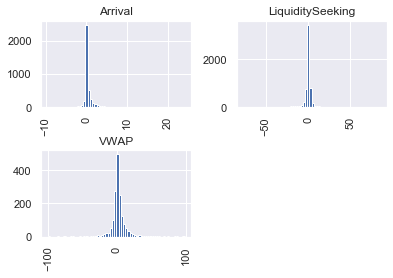

In [32]:
w = 3
n = math.ceil((df_buy['VWAP_Shortfall'].max() - df_buy['VWAP_Shortfall'].min())/w)
df_buy['VWAP_Shortfall'].hist(by=df_buy['AlgoClass'],bins = n-5);

In [33]:
algo_liquidityseeking = df_buy[df_buy['AlgoClass'] == 'LiquiditySeeking']['VWAP_Shortfall']
algo_vwap = df_buy[df_buy['AlgoClass'] == 'VWAP']['VWAP_Shortfall']
algo_arrival = df_buy[df_buy['AlgoClass'] == 'Arrival']['VWAP_Shortfall']

In [34]:
stats.f_oneway(algo_liquidityseeking,algo_vwap,algo_arrival)

F_onewayResult(statistic=94.4462186706497, pvalue=2.10051440525004e-41)

__F-statistic of 94 suggests the between-groups variance is 94x the within-group variance. Now we know the ratio of our variances doesn’t equal one, and the null hypothesis of equal mean values is rejected due to the p-value being < 0.05.__

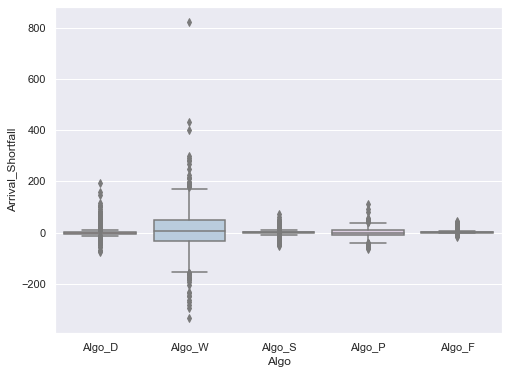

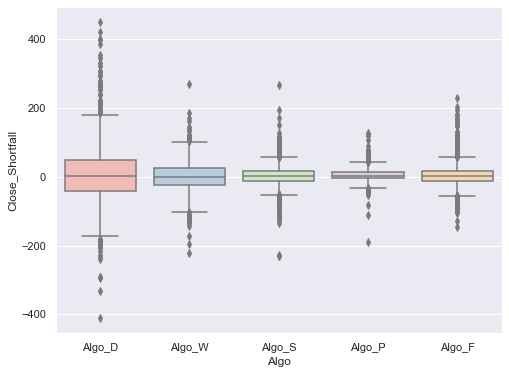

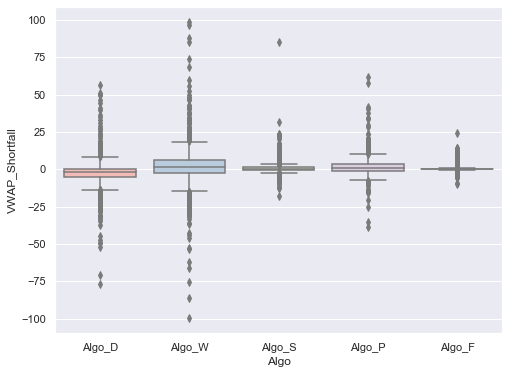

In [35]:
# Grouped boxplot
shortfalls = ['Arrival_Shortfall','Close_Shortfall','VWAP_Shortfall']
for i in range(len(shortfalls)):
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_buy["Algo"], y=df_buy[shortfalls[i]], data=df_buy, palette="Pastel1")
    plt.show()

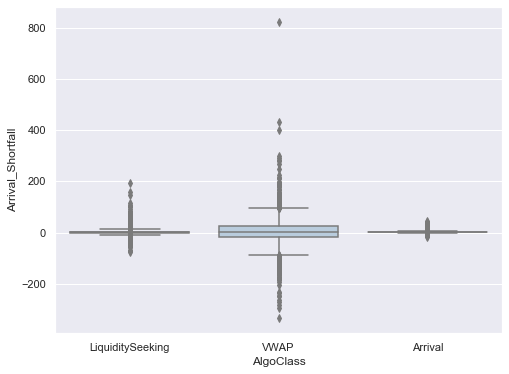

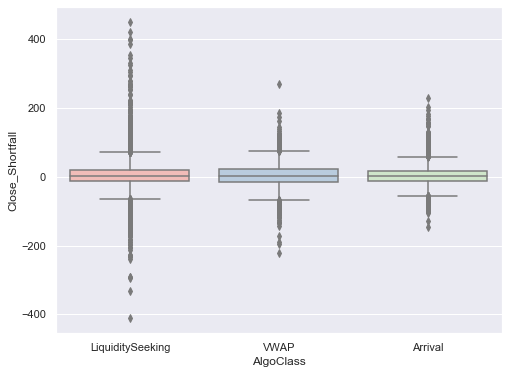

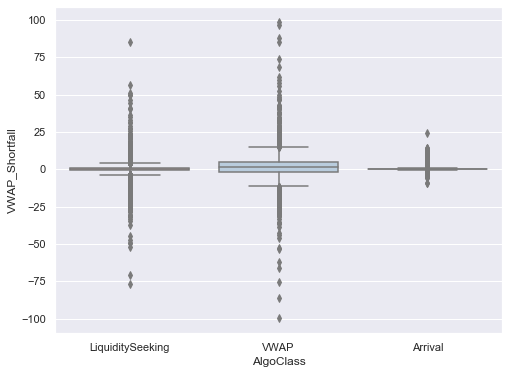

In [36]:
# Grouped boxplot
shortfalls = ['Arrival_Shortfall','Close_Shortfall','VWAP_Shortfall']
for i in range(len(shortfalls)):
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_buy["AlgoClass"], y=df_buy[shortfalls[i]], data=df_buy, palette="Pastel1")
    plt.show()

__Measuring Impact or Effectiveness of Different Algorithms and Algorithm Types Based on participation rate and spread:__

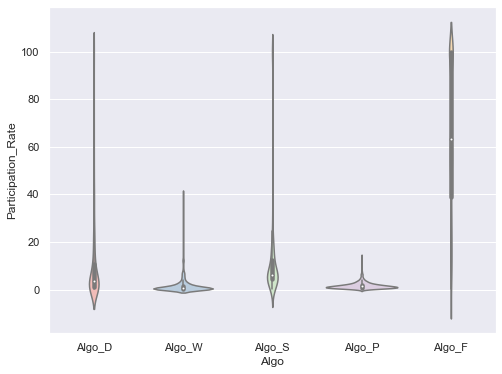

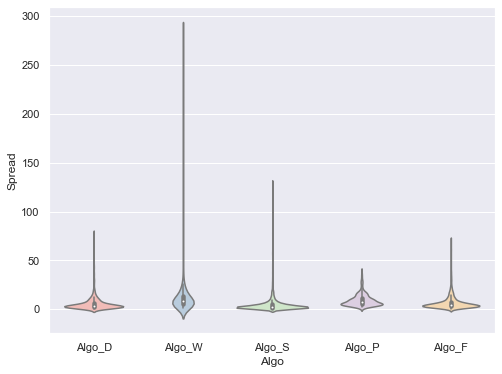

In [37]:
# Grouped boxplot
behaviors = ['Participation_Rate','Spread']
for i in range(len(behaviors)):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=df_buy["Algo"], y=df_buy[behaviors[i]], data=df_buy, palette="Pastel1")
    plt.show()

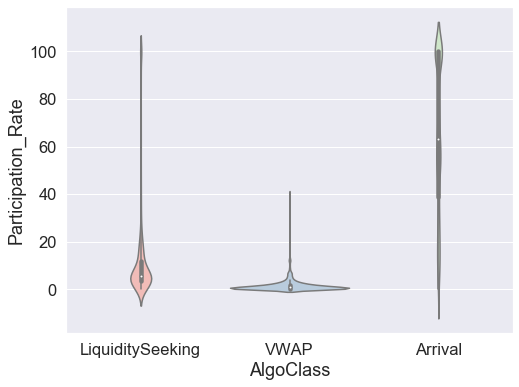

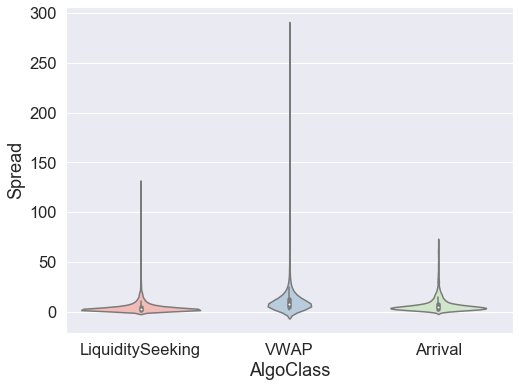

In [215]:
# Grouped boxplot
behaviors = ['Participation_Rate','Spread']
for i in range(len(behaviors)):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=df_buy["AlgoClass"], y=df_buy[behaviors[i]], data=df_buy, palette="Pastel1")
    plt.show()

__Measuring Impact or Effectiveness of Different Algorithms and Algorithm Types Based on Market Cap Size of Different Companies:__

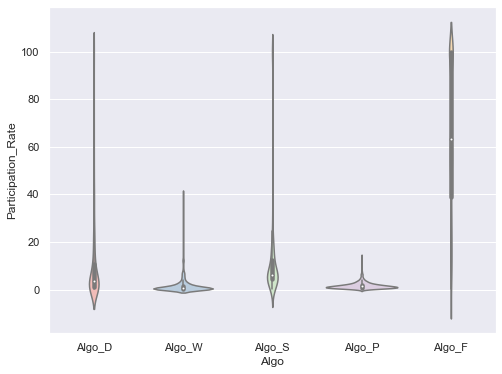

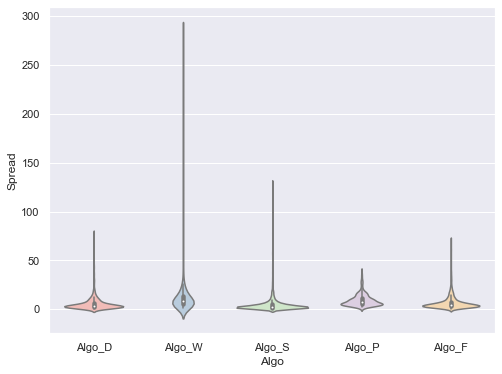

In [38]:
# Grouped boxplot
behaviors = ['Participation_Rate','Spread']
for i in range(len(behaviors)):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=df_buy["Algo"], y=df_buy[behaviors[i]], data=df_buy, palette="Pastel1")
    plt.show()

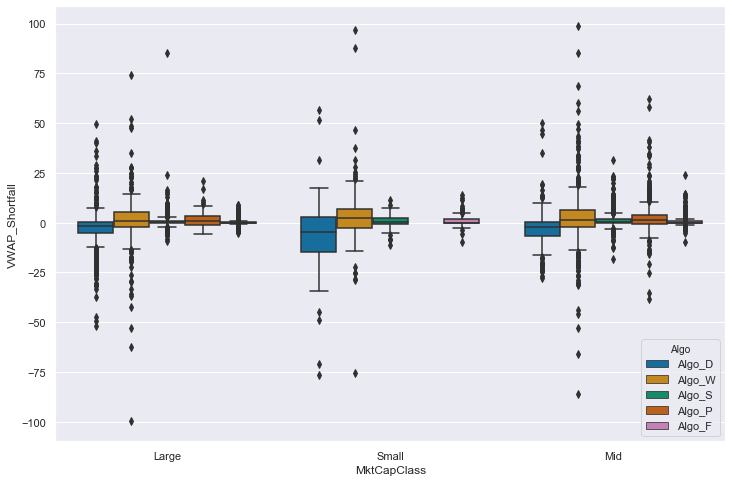

In [40]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df_buy['VWAP_Shortfall'], x=df_buy['MktCapClass'], 
                 data=df_buy, 
                 palette="colorblind",hue='Algo')
plt.savefig('PB_8.jpg',dpi=200)


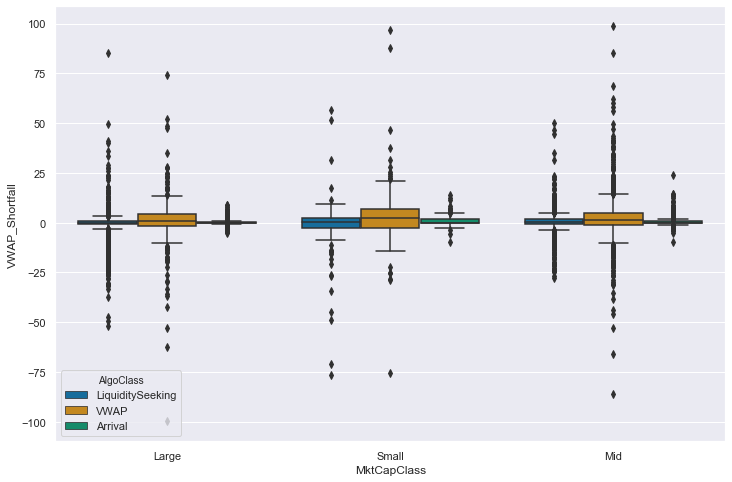

In [43]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df_buy['VWAP_Shortfall'], x=df_buy['MktCapClass'], 
                 data=df_buy, 
                 palette="colorblind",hue='AlgoClass')
plt.savefig('PB_9.jpg',dpi=200)


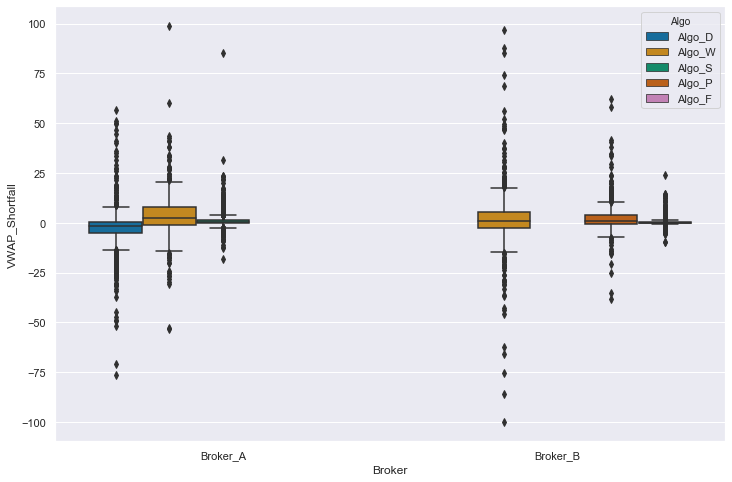

In [45]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df_buy['VWAP_Shortfall'], x=df_buy['Broker'], 
                 data=df_buy, 
                 palette="colorblind",hue='Algo')
plt.savefig('PB_10.jpg',dpi=200)


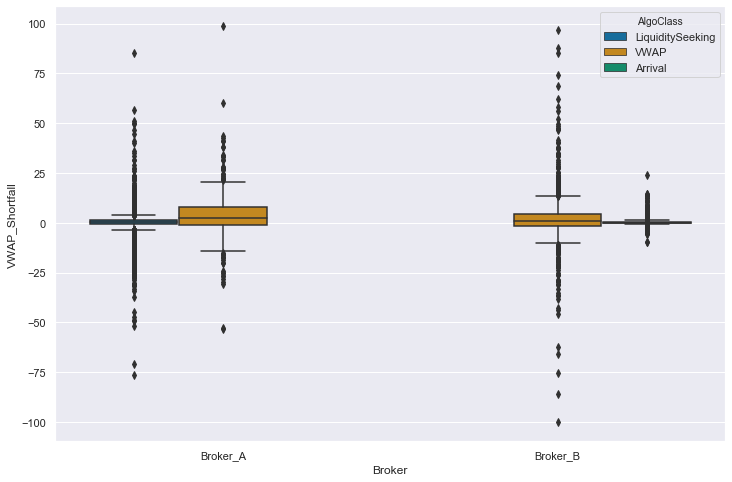

In [47]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df_buy['VWAP_Shortfall'], x=df_buy['Broker'], 
                 data=df_buy, 
                 palette="colorblind",hue='AlgoClass')
plt.savefig('PB_11.jpg',dpi=200)


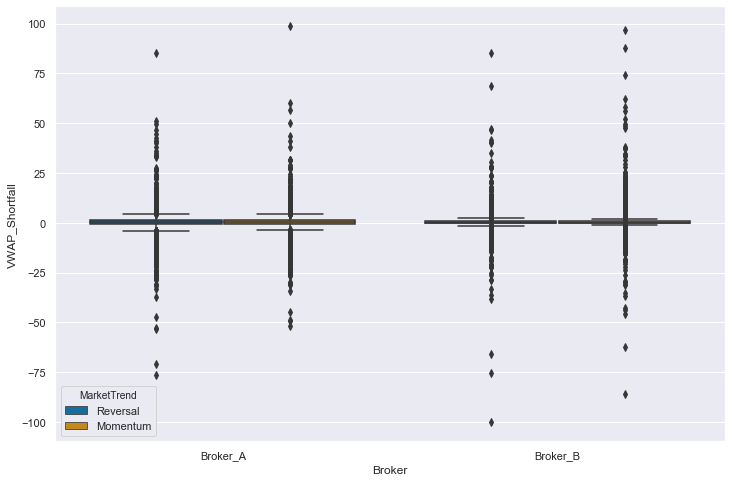

In [49]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df_buy['VWAP_Shortfall'], x=df_buy['Broker'], 
                 data=df_buy, 
                 palette="colorblind",hue='MarketTrend')
plt.savefig('PB_12.jpg',dpi=200)

### T-test For Comparing Broker's Performance

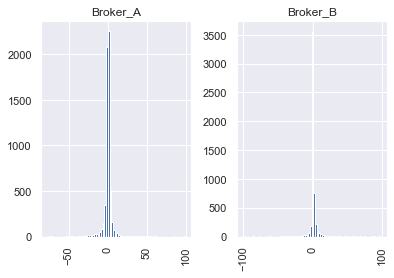

In [50]:
w = 3
n = math.ceil((df_buy['VWAP_Shortfall'].max() - df_buy['VWAP_Shortfall'].min())/w)
df_buy['VWAP_Shortfall'].hist(by=df_buy['Broker'],bins = 80);

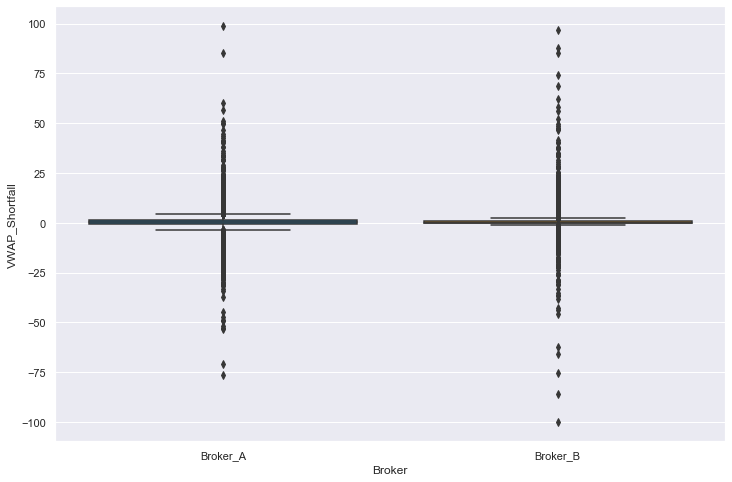

In [51]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df_buy['VWAP_Shortfall'], x=df_buy['Broker'], 
                 data=df_buy, 
                 palette="colorblind")

In [52]:
broker_a = df_buy[df_buy['Broker'] == 'Broker_A']['VWAP_Shortfall']
broker_b = df_buy[df_buy['Broker'] == 'Broker_B']['VWAP_Shortfall']

In [53]:
# t-test

stats.ttest_ind(broker_a,broker_b)

Ttest_indResult(statistic=-5.5650203281559625, pvalue=2.6810769663815466e-08)

__Since the p-value < 0.05, we reject the null hypothesis of equal averages, and conclude that the mean VWAP_Shortfall value across the brokers are significantly different.__

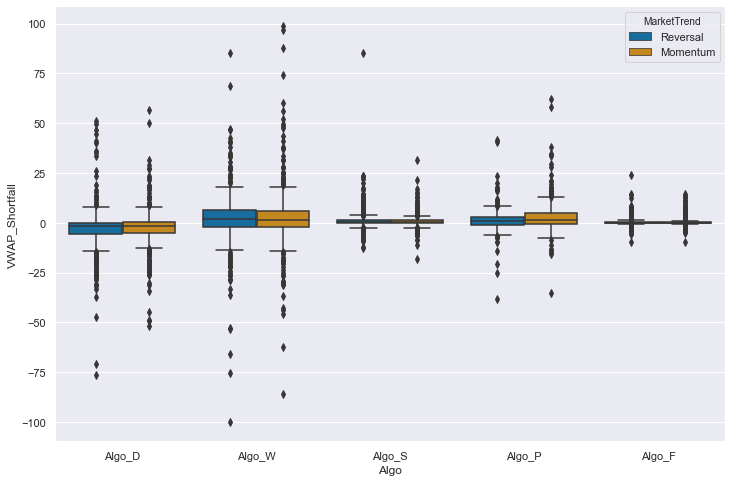

In [55]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df_buy['VWAP_Shortfall'], x=df_buy['Algo'], 
                 data=df_buy, 
                 palette="colorblind",hue='MarketTrend')
plt.savefig('PB_13.jpg',dpi=200)

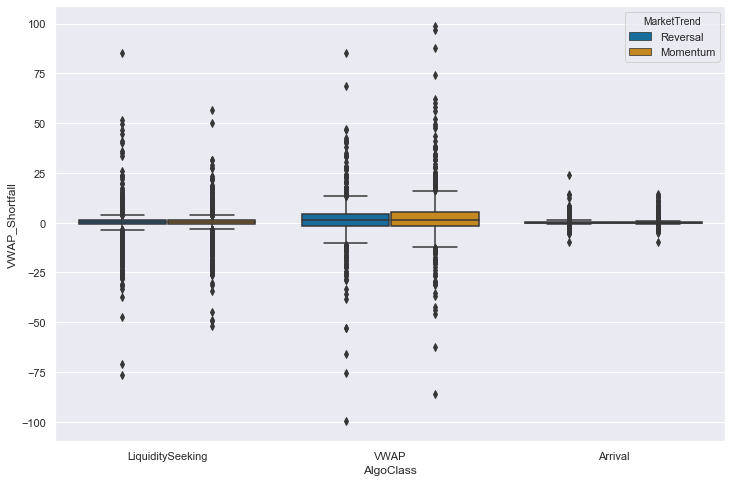

In [56]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df_buy['VWAP_Shortfall'], x=df_buy['AlgoClass'], 
                 data=df_buy, 
                 palette="colorblind",hue='MarketTrend')
plt.savefig('PB_14.jpg',dpi=200)

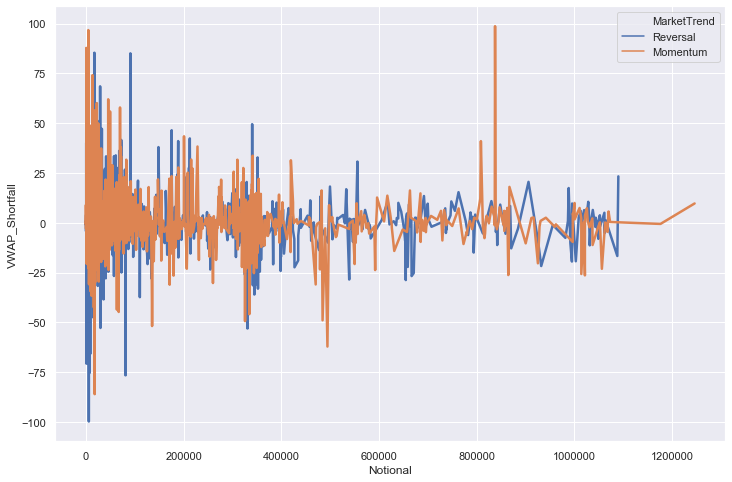

In [57]:
plt.figure(figsize=(12,8))

sns.lineplot(x=df_buy['Notional'], y=df_buy['VWAP_Shortfall'],
             hue="MarketTrend",
             data=df_buy,linewidth=2.5)


## Predicting Arrival Shortfall

In [105]:
df_buy_pred_numerical = df_buy[['Arrival_Price','Order_Qty','Participation_Rate','Spread','Open','ADV_20d']]
df_buy_pred_categorical = df_buy[['Algo','Broker','MktCapClass','AlgoClass','MarketTrend']]

In [106]:
df_buy_pred_numerical

,Arrival_Price,Order_Qty,Participation_Rate,Spread,Open,ADV_20d
0,115.395000,1449,3.609596,0.866774,115.80,28592876.00
1,62.295000,928,0.655645,1.604996,62.92,7102380.35
2,81.924999,388,0.265841,6.102584,78.51,2079935.45
3,141.349998,4777,41.676845,7.073990,144.54,1123868.40
4,32.184999,11495,26.079953,3.106516,32.06,2323461.90
...,...,...,...,...,...,...
16185,154.520000,54,54.545455,2.022466,153.86,2998165.00
16186,90.690000,85,100.000000,4.288991,90.50,1282649.15
16189,129.270000,89,38.362069,4.337481,127.89,1447059.45
16190,50.435000,228,100.000000,2.039720,50.51,4114173.95


In [107]:
df_buy_pred_categorical

,Algo,Broker,MktCapClass,AlgoClass,MarketTrend
0,Algo_D,Broker_A,Large,LiquiditySeeking,Reversal
1,Algo_D,Broker_A,Large,LiquiditySeeking,Reversal
2,Algo_D,Broker_A,Large,LiquiditySeeking,Momentum
3,Algo_D,Broker_A,Large,LiquiditySeeking,Reversal
4,Algo_D,Broker_A,Large,LiquiditySeeking,Momentum
...,...,...,...,...,...
16185,Algo_F,Broker_B,Large,Arrival,Momentum
16186,Algo_F,Broker_B,Large,Arrival,Momentum
16189,Algo_F,Broker_B,Large,Arrival,Momentum
16190,Algo_F,Broker_B,Large,Arrival,Momentum


__One-hot-encoding for Categorical Variables:__

In [108]:
dummy1=pd.get_dummies(df_buy_pred_categorical['Algo'],drop_first=True)

In [109]:
dummy1 = dummy1.reset_index(drop=True)

In [110]:
dummy2=pd.get_dummies(df_buy_pred_categorical['Broker'],drop_first=True)

In [111]:
dummy2 = dummy2.reset_index(drop=True)

In [112]:
dummy3=pd.get_dummies(df_buy_pred_categorical['MktCapClass'],drop_first=True)

In [113]:
dummy3 = dummy3.reset_index(drop=True)

In [114]:
dummy4=pd.get_dummies(df_buy_pred_categorical['AlgoClass'],drop_first=True)

In [115]:
dummy4 = dummy4.reset_index(drop=True)

In [116]:
dummy5=pd.get_dummies(df_buy_pred_categorical['MarketTrend'],drop_first=True)

In [117]:
dummy5 = dummy5.reset_index(drop=True)

__Standard Scaling Numerical Values:__

In [118]:
std = StandardScaler()
std.fit(df_buy_pred_numerical)
df_buy_pred_numerical_scaled = std.transform(df_buy_pred_numerical)

In [119]:
df_buy_pred_numerical_scaled_df = pd.DataFrame(data=df_buy_pred_numerical_scaled, columns=['Arrival_Price','Order_Qty','Participation_Rate','Spread','Open','ADV_20d'])

In [120]:
df_buy_pred_numerical_scaled_df

,Arrival_Price,Order_Qty,Participation_Rate,Spread,Open,ADV_20d
0,0.001689,0.005818,-0.710880,-0.603308,0.005143,5.296781
1,-0.360077,-0.131838,-0.794303,-0.526932,-0.355472,0.879326
2,-0.226339,-0.274514,-0.805311,-0.061619,-0.249156,-0.153057
3,0.178518,0.885123,0.364172,0.038881,0.201135,-0.349580
4,-0.565214,2.660115,-0.076298,-0.371587,-0.565921,-0.102999
...,...,...,...,...,...,...
11273,0.268244,-0.362761,0.727593,-0.483741,0.264693,0.035689
11274,-0.166624,-0.354571,2.011269,-0.249250,-0.167390,-0.316942
11275,0.096218,-0.353514,0.270560,-0.244234,0.087590,-0.283147
11276,-0.440878,-0.316788,2.011269,-0.481956,-0.440102,0.265089


In [121]:
df_buy_pred_numerical_scaled_df.isnull().sum()

Arrival_Price         0
Order_Qty             0
Participation_Rate    0
Spread                0
Open                  0
ADV_20d               0
dtype: int64

In [122]:
# Concatenating the one-hot encoded dummy variables and scaled features

df_buy_pred = pd.concat([df_buy_pred_numerical_scaled_df,dummy1,dummy2,dummy3,dummy4,dummy5],axis=1)

In [123]:
df_buy_pred

,Arrival_Price,Order_Qty,Participation_Rate,Spread,Open,ADV_20d,Algo_F,Algo_P,Algo_S,Algo_W,Broker_B,Mid,Small,LiquiditySeeking,VWAP,Reversal
0,0.001689,0.005818,-0.710880,-0.603308,0.005143,5.296781,0,0,0,0,0,0,0,1,0,1
1,-0.360077,-0.131838,-0.794303,-0.526932,-0.355472,0.879326,0,0,0,0,0,0,0,1,0,1
2,-0.226339,-0.274514,-0.805311,-0.061619,-0.249156,-0.153057,0,0,0,0,0,0,0,1,0,0
3,0.178518,0.885123,0.364172,0.038881,0.201135,-0.349580,0,0,0,0,0,0,0,1,0,1
4,-0.565214,2.660115,-0.076298,-0.371587,-0.565921,-0.102999,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11273,0.268244,-0.362761,0.727593,-0.483741,0.264693,0.035689,1,0,0,0,1,0,0,0,0,0
11274,-0.166624,-0.354571,2.011269,-0.249250,-0.167390,-0.316942,1,0,0,0,1,0,0,0,0,0
11275,0.096218,-0.353514,0.270560,-0.244234,0.087590,-0.283147,1,0,0,0,1,0,0,0,0,0
11276,-0.440878,-0.316788,2.011269,-0.481956,-0.440102,0.265089,1,0,0,0,1,0,0,0,0,0


In [124]:
df_buy_shortfall = df_buy['Arrival_Shortfall']

In [125]:
df_buy_shortfall

0        -3.750202
1         3.321282
2       -20.675037
3        -7.905092
4         4.949987
           ...    
16185     0.647165
16186     0.972933
16189     0.773575
16190     0.991375
16194     0.843479
Name: Arrival_Shortfall, Length: 11278, dtype: float64

In [126]:
def binary_conversion(value):
    if value<=0:
        return 0
    else:
        return 1

In [127]:
df_buy_shortfall_binary = df_buy_shortfall.apply(lambda x: binary_conversion(x))


In [128]:
df_buy_shortfall_binary = df_buy_shortfall_binary.reset_index(drop=True)

In [129]:
df_buy_pred_new = pd.concat([df_buy_pred,df_buy_shortfall_binary],axis=1)

In [130]:
df_buy_pred_new

,Arrival_Price,Order_Qty,Participation_Rate,Spread,Open,ADV_20d,Algo_F,Algo_P,Algo_S,Algo_W,Broker_B,Mid,Small,LiquiditySeeking,VWAP,Reversal,Arrival_Shortfall
0,0.001689,0.005818,-0.710880,-0.603308,0.005143,5.296781,0,0,0,0,0,0,0,1,0,1,0
1,-0.360077,-0.131838,-0.794303,-0.526932,-0.355472,0.879326,0,0,0,0,0,0,0,1,0,1,1
2,-0.226339,-0.274514,-0.805311,-0.061619,-0.249156,-0.153057,0,0,0,0,0,0,0,1,0,0,0
3,0.178518,0.885123,0.364172,0.038881,0.201135,-0.349580,0,0,0,0,0,0,0,1,0,1,0
4,-0.565214,2.660115,-0.076298,-0.371587,-0.565921,-0.102999,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11273,0.268244,-0.362761,0.727593,-0.483741,0.264693,0.035689,1,0,0,0,1,0,0,0,0,0,1
11274,-0.166624,-0.354571,2.011269,-0.249250,-0.167390,-0.316942,1,0,0,0,1,0,0,0,0,0,1
11275,0.096218,-0.353514,0.270560,-0.244234,0.087590,-0.283147,1,0,0,0,1,0,0,0,0,0,1
11276,-0.440878,-0.316788,2.011269,-0.481956,-0.440102,0.265089,1,0,0,0,1,0,0,0,0,0,1


__Generating Train/Test Dataset:__

In [131]:
X = pd.DataFrame(df_buy_pred)
y = df_buy_pred_new['Arrival_Shortfall']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=678)

__Using Logistic Regression For a Quick Test:__

In [133]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
LR.score(X_train, y_train)

0.6801368127691918

In [135]:
# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(C=3.6)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=6)))
models.append(('DT', DecisionTreeClassifier(max_depth=5)))
models.append(('RF', RandomForestClassifier(n_estimators=261,max_depth=29)))
models.append(('NB', GaussianNB()))
models.append(('XGBoost', XGBClassifier()))

In [136]:
"""
"score" function: returns each models' mean cross-validation score and plots the box-plot of metric vs. models. 
"""
def score(scoring,features,labels):
    model_cv_mean = []
    model_cv_results = []
    model_names   = []

    for name, model in models:
        kfold = KFold(n_splits=10, random_state=10)
        cv_results = cross_val_score(model, features, labels, cv=kfold, scoring=scoring)
        model_cv_results.append(cv_results)
        model_names.append(name)
        model_cv_mean.append(cv_results.mean())
        status = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(status)

    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Model Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(model_cv_results)
    ax.set_xticklabels(model_names)
    plt.ylabel(str(scoring)+" "+"(x100 %)")
    plt.show()
    
    return model_cv_mean

LR: 0.679505 (0.012099)
LDA: 0.680264 (0.012697)
KNN: 0.637318 (0.011322)
DT: 0.668357 (0.008199)
RF: 0.684444 (0.008311)
NB: 0.605140 (0.017272)
XGBoost: 0.685461 (0.008976)


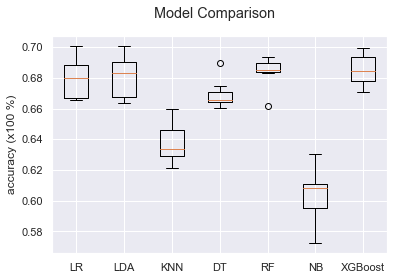

In [137]:
scoring    = "accuracy"

accuracy_list = score(scoring,X_train, y_train)

LR: 0.690269 (0.015366)
LDA: 0.691065 (0.016053)
KNN: 0.730391 (0.014862)
DT: 0.686655 (0.023364)
RF: 0.728218 (0.016522)
NB: 0.809675 (0.018616)
XGBoost: 0.702518 (0.016326)


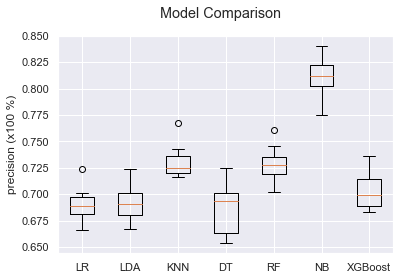

In [138]:
scoring    = "precision"

precision_list = score(scoring,X_train, y_train)

LR: 0.896554 (0.013617)
LDA: 0.896159 (0.013075)
KNN: 0.678510 (0.016000)
DT: 0.883750 (0.057045)
RF: 0.812317 (0.021248)
NB: 0.492733 (0.019516)
XGBoost: 0.874122 (0.014050)


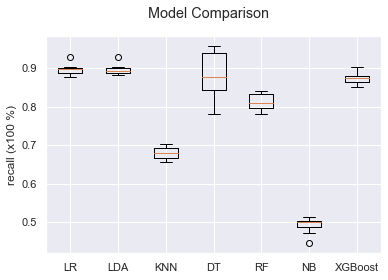

In [139]:
scoring    = "recall"

recall_list = score(scoring,X_train, y_train)

LR: 0.779869 (0.011171)
LDA: 0.780214 (0.011172)
KNN: 0.703283 (0.009473)
DT: 0.771246 (0.012872)
RF: 0.766669 (0.009277)
NB: 0.612482 (0.018690)
XGBoost: 0.778762 (0.008844)


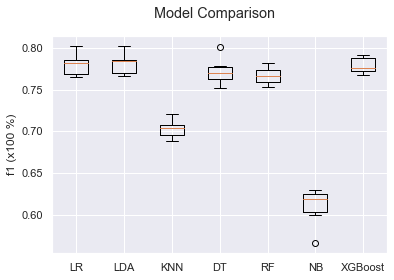

In [140]:
scoring    = "f1"

f1_list = score(scoring,X_train, y_train)

In [141]:
model_names = ['LR','LDA','KNN','DT','RF','NB', 'XGBoost']
score_dataframe = pd.DataFrame({'model':model_names,'accuracy':accuracy_list,'f1':f1_list,'precision':precision_list,'recall':recall_list})

In [142]:
score_dataframe

,model,accuracy,f1,precision,recall
0,LR,0.679505,0.779869,0.690269,0.896554
1,LDA,0.680264,0.780214,0.691065,0.896159
2,KNN,0.637318,0.703283,0.730391,0.678510
3,DT,0.668357,0.771246,0.686655,0.883750
4,RF,0.684444,0.766669,0.728218,0.812317
5,NB,0.605140,0.612482,0.809675,0.492733
6,XGBoost,0.685461,0.778762,0.702518,0.874122


### Classification-Based Confusion Matrix 

In [146]:
"""
"classification_accuracy" function: returns the classification accuracy of the test dataset
"""
def classification_accuracy(classifier, train_features, train_label, test_features, test_label):
    clf  = classifier

    # fit the training data to the model
    clf = clf.fit(train_features, train_label)

    #Predict the response for test dataset
    y_pred = clf.predict(test_image_data)


    # Model Accuracy
    print("Binary Classification f1 score:",round(metrics.f1_score(test_label, y_pred)*100,2),'%')

In [147]:
classification_accuracy(XGBClassifier(),X_train, y_train,X_test, y_test)

Binary Classification f1 score: 78.34 %


In [151]:
clf  = XGBClassifier()

# fit the training data to the model
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [152]:
cf_matrix = confusion_matrix(y_test, y_pred)

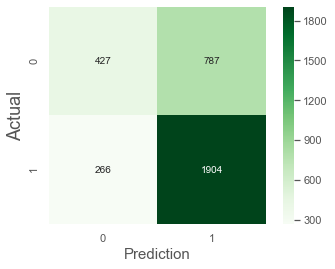

In [153]:
ax = sns.heatmap(cf_matrix, annot=True,cmap=plt.cm.Greens, square=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('Actual',fontsize=18)
plt.savefig('PB_18.jpg',dpi=200)
plt.show()

### Principal Component Analysis For Visualization 

In [154]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [155]:
finalDf = pd.concat([principalDf, y], axis = 1)

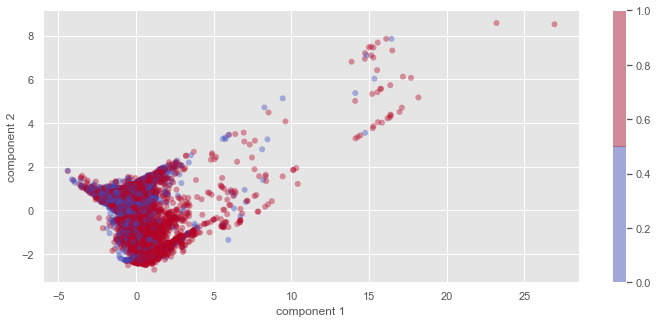

In [157]:
fig = plt.figure(figsize = (12,5))

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=df_buy_pred_new.Arrival_Shortfall,cmap=plt.cm.get_cmap('coolwarm', 2),edgecolor='none', alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.savefig('PB_19.jpg',dpi=200)

## Important Predictors of Arrival Shortfall

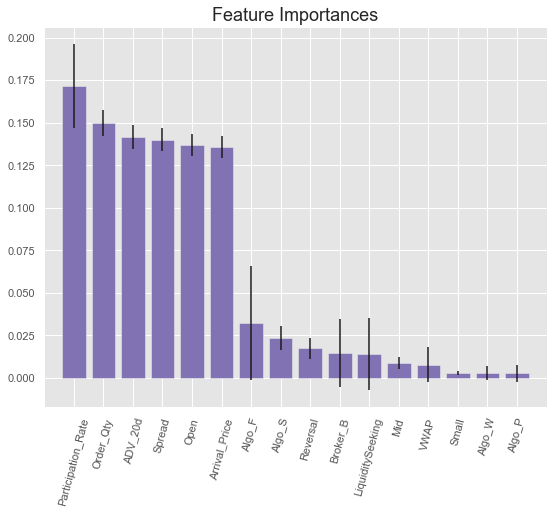

In [165]:
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = ['Arrival_Price', 'Order_Qty','Participation_Rate','Spread','Open','ADV_20d','Algo_F','Algo_P','Algo_S','Algo_W','Broker_B','Mid','Small','LiquiditySeeking','VWAP','Reversal']

features_ranked = []
for i in indices:
    features_ranked.append(features[i])

plt.figure(figsize=(9,7))
plt.title("Feature Importances",size=18)
plt.bar(range(X_train.shape[1]), importances[indices],
        color="m", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), features_ranked,rotation=75)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('PB_20.jpg',dpi=200)
plt.show()

## Measuring Impact of Features on Side

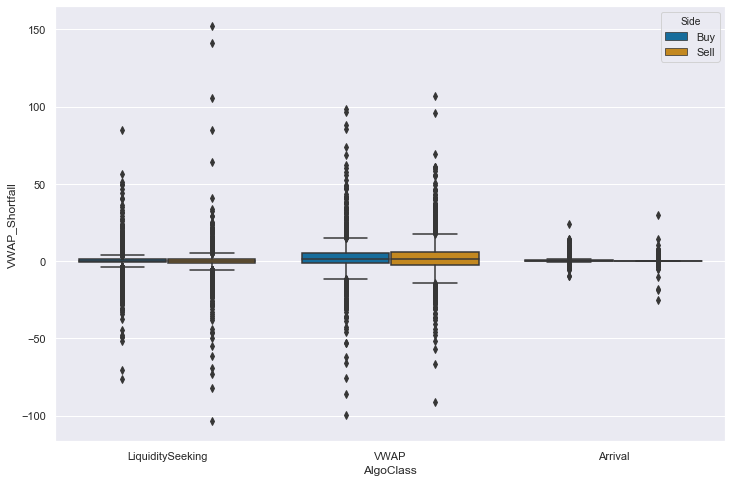

In [63]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df['VWAP_Shortfall'], x=df['AlgoClass'], 
                 data=df, 
                 palette="colorblind",hue='Side')

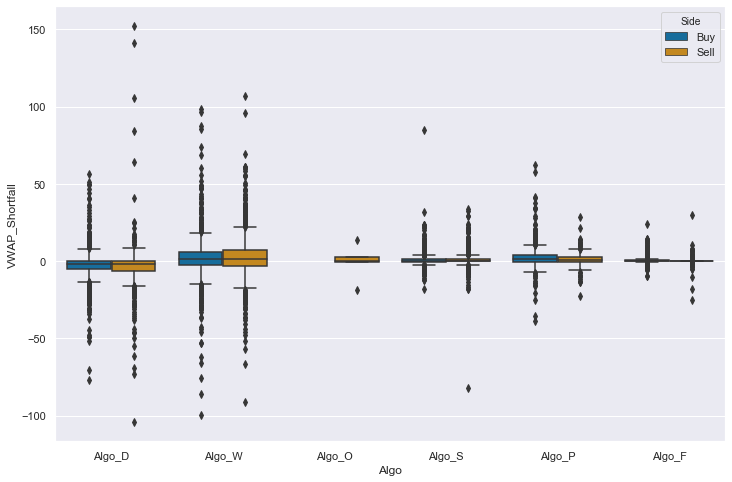

In [64]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df['VWAP_Shortfall'], x=df['Algo'], 
                 data=df, 
                 palette="colorblind",hue='Side')

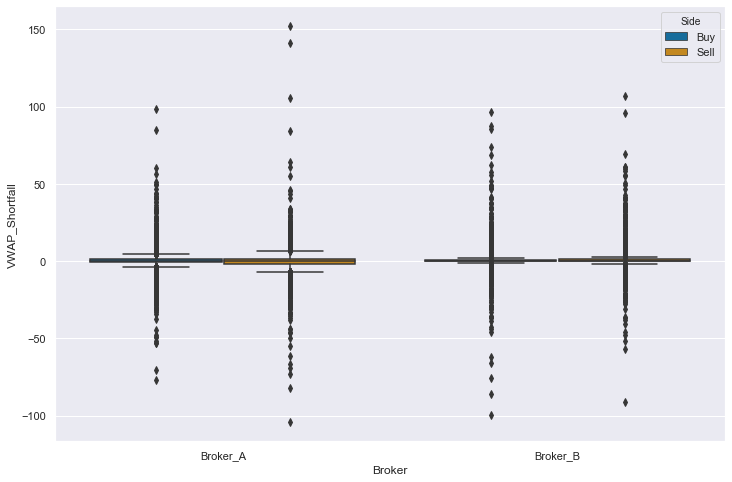

In [65]:
plt.figure(figsize=(12,8))

sns.boxplot(y=df['VWAP_Shortfall'], x=df['Broker'], 
                 data=df, 
                 palette="colorblind",hue='Side')